In [1]:
import pandas as pd
import numpy as np
almonds_data = pd.read_csv('Almond.csv')
almonds_data.drop(columns=["Unnamed: 0"],inplace=True)
print("First five values", almonds_data.head())

First five values    Length (major axis)  Width (minor axis)  Thickness (depth)     Area  \
0                  NaN          227.940628         127.759132  22619.0   
1                  NaN          234.188126         128.199509  23038.0   
2                  NaN          229.418610         125.796547  22386.5   
3                  NaN          232.763153         125.918808  22578.5   
4                  NaN          230.150742         107.253448  19068.0   

    Perimeter  Roundness  Solidity  Compactness  Aspect Ratio  Eccentricity  \
0  643.813269        NaN  0.973384     1.458265           NaN           NaN   
1  680.984841        NaN  0.957304     1.601844           NaN           NaN   
2  646.943212        NaN  0.967270     1.487772           NaN           NaN   
3  661.227483        NaN  0.965512     1.540979           NaN           NaN   
4  624.842706        NaN  0.951450     1.629395           NaN           NaN   

     Extent  Convex hull(convex area)   Type  
0  0.681193    

In [2]:
print("Columns with their Non-null counts and their types", almonds_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Length (major axis)       1946 non-null   float64
 1   Width (minor axis)        1861 non-null   float64
 2   Thickness (depth)         1799 non-null   float64
 3   Area                      2803 non-null   float64
 4   Perimeter                 2803 non-null   float64
 5   Roundness                 1946 non-null   float64
 6   Solidity                  2803 non-null   float64
 7   Compactness               2803 non-null   float64
 8   Aspect Ratio              1004 non-null   float64
 9   Eccentricity              1004 non-null   float64
 10  Extent                    2803 non-null   float64
 11  Convex hull(convex area)  2803 non-null   float64
 12  Type                      2803 non-null   object 
dtypes: float64(12), object(1)
memory usage: 284.8+ KB
Columns with 

In [3]:
print("Stats for numeric attributes", almonds_data.describe())

Stats for numeric attributes        Length (major axis)  Width (minor axis)  Thickness (depth)  \
count          1946.000000         1861.000000        1799.000000   
mean            290.609274          171.025915         109.705378   
std              62.719433           29.916529          18.940597   
min             151.335266           88.050529          59.494278   
25%             245.966293          149.453659          97.091682   
50%             279.879883          170.168365         110.280136   
75%             330.508575          190.640427         121.392773   
max             515.352478          258.569794         181.845200   

               Area    Perimeter    Roundness     Solidity  Compactness  \
count   2803.000000  2803.000000  1946.000000  2803.000000  2803.000000   
mean   26511.117374   743.863770     0.470466     0.955828     1.825233   
std    13782.561344   230.632076     0.118673     0.039596     0.794058   
min     6037.000000   311.563489     0.173748    

In [4]:
percent_not_null = almonds_data.notnull().mean() * 100

print(percent_not_null)

almonds_data.drop(columns=['Aspect Ratio', 'Eccentricity'], inplace=True)
print(almonds_data)

Length (major axis)          69.425615
Width (minor axis)           66.393150
Thickness (depth)            64.181234
Area                        100.000000
Perimeter                   100.000000
Roundness                    69.425615
Solidity                    100.000000
Compactness                 100.000000
Aspect Ratio                 35.818766
Eccentricity                 35.818766
Extent                      100.000000
Convex hull(convex area)    100.000000
Type                        100.000000
dtype: float64
      Length (major axis)  Width (minor axis)  Thickness (depth)     Area  \
0                     NaN          227.940628         127.759132  22619.0   
1                     NaN          234.188126         128.199509  23038.0   
2                     NaN          229.418610         125.796547  22386.5   
3                     NaN          232.763153         125.918808  22578.5   
4                     NaN          230.150742         107.253448  19068.0   
...             

In [5]:
from sklearn.preprocessing import LabelEncoder

one_hot_encode = pd.get_dummies(almonds_data["Type"])
#almonds_data["Type"] = [LabelEncoder().fit_transform(almonds_data["Type"])] #check if maybe one hot encoding to prevent form assuming ordianol relationship
almonds_data = almonds_data.drop("Type", axis=1)
print(almonds_data)

      Length (major axis)  Width (minor axis)  Thickness (depth)     Area  \
0                     NaN          227.940628         127.759132  22619.0   
1                     NaN          234.188126         128.199509  23038.0   
2                     NaN          229.418610         125.796547  22386.5   
3                     NaN          232.763153         125.918808  22578.5   
4                     NaN          230.150742         107.253448  19068.0   
...                   ...                 ...                ...      ...   
2798                  NaN          192.709366         122.356506  18471.5   
2799                  NaN          186.254745         118.708961  17213.5   
2800                  NaN          186.196182         119.147224  17510.5   
2801                  NaN          188.660828         120.634438  17941.0   
2802           269.356903          176.023636                NaN  36683.5   

       Perimeter  Roundness  Solidity  Compactness    Extent  \
0     643.8

In [6]:
from sklearn.model_selection import train_test_split
import torch

num_features = almonds_data.select_dtypes(include=['int64', 'float64']).columns
print(num_features)

X = almonds_data[num_features]
# y = almonds_data["MAMRA",  "REGULAR", "SANORA"]
X_train, X_test, y_train, y_test = train_test_split(X, one_hot_encode.astype("float64"), test_size=0.3, random_state=5)


print(X_train)
print(X_test)
print(y_train)
print(y_test)

Index(['Length (major axis)', 'Width (minor axis)', 'Thickness (depth)',
       'Area', 'Perimeter', 'Roundness', 'Solidity', 'Compactness', 'Extent',
       'Convex hull(convex area)'],
      dtype='object')
      Length (major axis)  Width (minor axis)  Thickness (depth)     Area  \
1481           256.791199                 NaN          70.634346  13893.0   
247            285.089111          182.272736                NaN  38908.5   
2025                  NaN          154.184448         102.262245  12135.0   
2171           230.673859          147.944733                NaN  26349.0   
753            239.546631                 NaN         104.702888  17409.5   
...                   ...                 ...                ...      ...   
1032           419.353516                 NaN         114.451721  32626.5   
2121           343.750488          190.821793                NaN  50067.5   
1424           257.446320          133.669800                NaN  25247.5   
1725           262.81

In [7]:
from sklearn.impute import SimpleImputer



for feature in ["Length (major axis)", "Width (minor axis)", "Thickness (depth)", "Roundness"]:
    X_train[feature] = X_train[feature].fillna(X_train[feature].mean())
    X_test[feature] = X_test[feature].fillna(X_test[feature].mean())

print(X_train)
print(X_test)

      Length (major axis)  Width (minor axis)  Thickness (depth)     Area  \
1481           256.791199          171.269798          70.634346  13893.0   
247            285.089111          182.272736         109.939933  38908.5   
2025           292.690803          154.184448         102.262245  12135.0   
2171           230.673859          147.944733         109.939933  26349.0   
753            239.546631          171.269798         104.702888  17409.5   
...                   ...                 ...                ...      ...   
1032           419.353516          171.269798         114.451721  32626.5   
2121           343.750488          190.821793         109.939933  50067.5   
1424           257.446320          133.669800         109.939933  25247.5   
1725           262.819336          171.269798         119.488258  24278.5   
2254           241.192123          140.644928         109.939933  25475.0   

        Perimeter  Roundness  Solidity  Compactness    Extent  \
1481   589

In [8]:
from sklearn.preprocessing import RobustScaler #check diff scalers




X_train[num_features] = RobustScaler().fit_transform(X_train[num_features])
print(X_train)
X_test[num_features] = RobustScaler().fit_transform(X_test[num_features])
print(X_test)

      Length (major axis)  Width (minor axis)  Thickness (depth)      Area  \
1481            -0.958643            0.000000          -4.019193 -0.550244   
247             -0.202991            0.569608           0.000000  0.867256   
2025             0.000000           -0.884487          -0.785082 -0.649861   
2171            -1.656067           -1.207509           0.000000  0.155573   
753             -1.419133            0.000000          -0.535514 -0.350982   
...                   ...                 ...                ...       ...   
1032             3.382332            0.000000           0.461353  0.511287   
2121             1.363470            1.012182           0.000000  1.499579   
1424            -0.941149           -1.946504           0.000000  0.093157   
1725            -0.797671            0.000000           0.976364  0.038249   
2254            -1.375193           -1.585411           0.000000  0.106048   

      Perimeter  Roundness  Solidity  Compactness    Extent  \


In [9]:
X_train_torch = torch.from_numpy(X_train.to_numpy()).float()
y_train_torch = torch.tensor(y_train.to_numpy(), dtype=torch.float64) #torch.from_numpy(y_train.to_numpy()).float().view(-1, 1)  
X_test_torch = torch.from_numpy(X_test.to_numpy()).float()
y_test_torch = torch.tensor(y_test.to_numpy(), dtype=torch.float64) #torch.from_numpy(y_test.to_numpy()).float().view(-1, 1)

print(X_train_torch)
print(X_test_torch)
print(y_train_torch)
print(y_test_torch)

tensor([[-0.9586,  0.0000, -4.0192,  ...,  0.6648,  0.4945, -0.5735],
        [-0.2030,  0.5696,  0.0000,  ...,  1.2278, -1.3844,  0.9780],
        [ 0.0000, -0.8845, -0.7851,  ..., -0.4880,  0.9256, -0.6770],
        ...,
        [-0.9411, -1.9465,  0.0000,  ..., -0.3306,  0.8794,  0.0431],
        [-0.7977,  0.0000,  0.9764,  ...,  0.1463,  0.4924,  0.0207],
        [-1.3752, -1.5854,  0.0000,  ...,  0.8881, -0.2815,  0.1559]])
tensor([[-1.7425,  0.0000, -1.3933,  ..., -0.0167, -0.4312, -0.4447],
        [ 1.6434,  0.3373,  0.0000,  ...,  1.8651, -0.1900,  1.6024],
        [ 0.0000,  2.3611,  1.7535,  ..., -0.3861,  0.5188, -0.1345],
        ...,
        [ 0.0424,  0.1198,  0.0000,  ..., -0.1427,  0.2815,  0.9126],
        [ 0.7633, -0.0145,  0.0000,  ..., -0.4374,  0.7540,  1.0376],
        [ 0.3870,  0.4952,  0.0000,  ..., -0.5238,  0.4854,  1.0550]])
tensor([[1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        ...,
        [1., 0., 0.],
        [0., 1., 0.],
        [

In [10]:
from torch import nn
import torch


class RpropModel(nn.Module):
    def __init__(self, activation_func=nn.ReLU()):
        super(RpropModel, self).__init__()
        self.activation_func = activation_func
#         self.fc1 = nn.Linear(10, 30)
#         self.fc2 = nn.Linear(30, 3)
        self.fc1 = nn.Linear(10, 35)
        self.fc2 = nn.Linear(35, 45)    
        self.fc3 = nn.Linear(45, 3)

    def forward(self, x):
#         x = torch.relu(self.fc1(x))
#         x = torch.softmax(self.fc2(x), dim=1)

        x = self.activation_func(self.fc1(x))  #torch.relu  
        x = self.activation_func(self.fc2(x)) #nn.ReLU()(self.fc2(x))
        x = torch.softmax(self.fc3(x), dim=1)
        return x

model = RpropModel()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Rprop(model.parameters())

def train(model, optimizer, loss_function):
    train_losses = []
    test_losses = []
    for epoch in range(64):
        optimizer.zero_grad()
        y_pred = model(X_train_torch)
        loss = loss_function(y_pred, y_train_torch)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            y_pred_test = model(X_test_torch)
            test_loss = loss_function(y_pred_test, y_test_torch).item()
            test_losses.append(test_loss)
        model.train()

    return train_losses, test_losses

def evaluate(model):
    with torch.no_grad():
        y_pred = model(X_test_torch)
        test_loss = loss_function(y_pred, y_test_torch).item()
        #print(y_pred)
        #print(y_test_torch)
        accuracy = (np.argmax(y_pred.numpy(), axis=1)==np.argmax(y_test_torch.numpy(), axis=1)).sum() / y_test_torch.shape[0]
        #print(f'Accuracy: {accuracy*100:.2f}%')
    return test_loss, accuracy
    #     y_pred_cls = y_pred.round()
    #     acc = y_pred_cls.eq(y_test_torch).sum().item() / y_test_torch.shape[0]
    #     print(f'Accuracy: {acc*100:.2f}%')

        
#train(model, optimizer, loss_function) evaluate(model)

In [11]:
%%capture
!pip install skorch

#note that I added %%capture to the start of the cell because the verbose option wasn't working properly in my jupyter notebook instance, so my notebook was producing too much output and craching without %%capture
from torch import nn
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import skorch
from skorch import NeuralNetClassifier
import torch.optim as optim

net = NeuralNetClassifier(
    train_split=None,
    module=RpropModel,
    criterion=nn.CrossEntropyLoss,
    optimizer=optim.Rprop,
    #optimizer__lr=0.001,
#     batch_size=32,
    max_epochs=64,
)

hyperparameter_grid = {
    'module__activation_func': [nn.ReLU(), nn.LeakyReLU(0.01), nn.Tanh(), nn.ELU(alpha=1.0)],
    'optimizer__lr': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]
}

grid_search = GridSearchCV(net, hyperparameter_grid, cv=5, scoring='accuracy', verbose=0)
grid_search.fit(X_train.to_numpy(dtype='float32'), np.argmax(y_train.to_numpy(dtype='float32'), axis=1))

In [12]:
print("Best parameters found: ", grid_search.best_params_)
print("Highest accuracy found: ", grid_search.best_score_)

Best parameters found:  {'module__activation_func': ReLU(), 'optimizer__lr': 0.005}
Highest accuracy found:  0.6778885600041543


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


rprop_opt_results = grid_search.cv_results_
#print(rprop_opt_results)
data = pd.DataFrame({
    'Activation Function': rprop_opt_results['param_module__activation_func'],
    'Learning Rate': rprop_opt_results['param_optimizer__lr'],
    'mean_score': rprop_opt_results['mean_test_score'],
    'std_score': rprop_opt_results['std_test_score']
})

heatmap_data = data.pivot(index='Activation Function', columns='Learning Rate', values='mean_score')
heatmap_data_std = data.pivot(index='Activation Function', columns='Learning Rate', values='std_score')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True)
plt.title('Heatmap showing the Mean Test Scores of the Grid Search Results for Hyperparameter Optimization (Learning Rate and Activation function)')
plt.xlabel('Learning Rate')
plt.ylabel('Activation Function')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_std, annot=True, fmt=".3f", cmap="coolwarm")
plt.title('Heatmap showing the Standard Deviation of Test Scores of the Grid Search Results for Hyperparameter Optimization (Learning Rate and Activation function)')
plt.xlabel('Learning Rate')
plt.ylabel('Activation Function')
plt.show()

In [14]:
from scipy.stats import ttest_rel
import numpy as np

mask_relu = np.array([isinstance(act_func, nn.ReLU) for act_func in rprop_opt_results['param_module__activation_func']])
scores_relu = np.array([rprop_opt_results[f'split{i}_test_score'][mask_relu] for i in range(5)])

# print(mask_relu)
# print(scores_relu)
# print(rprop_opt_results['param_module__activation_func'])
# print(type(rprop_opt_results['param_module__activation_func'][0]) == type(nn.ReLU()))

mask_lrelu = np.array([isinstance(act_func, nn.LeakyReLU) for act_func in rprop_opt_results['param_module__activation_func']])
scores_lrelu = np.array([rprop_opt_results[f'split{i}_test_score'][mask_lrelu] for i in range(5)])

avg_relu_score = scores_relu.mean(axis=1)
avg_lrelu_score = scores_lrelu.mean(axis=1)

t_statistic, p_value = ttest_rel(avg_relu_score, avg_lrelu_score)
print(f"T-statistic: {t_statistic}, P-value: {p_value}")


T-statistic: 0.22241616790905228, P-value: 0.8348850125956644


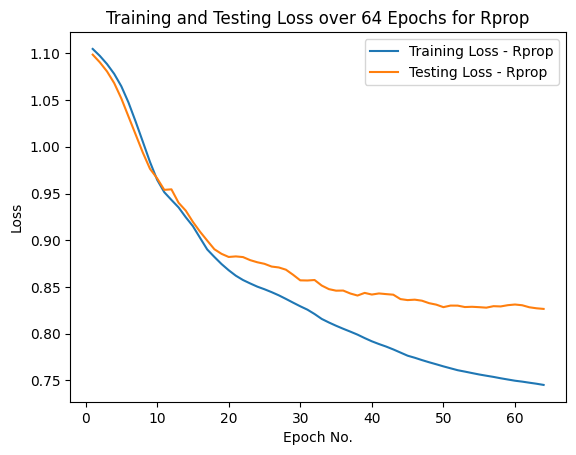

In [15]:
#now i use the best parameters to train my model and then evaluate that model

model = RpropModel(nn.ReLU())
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Rprop(model.parameters(), 0.005)#hard code best learning rate

training_losses, testing_losses = train(model, optimizer, loss_function)

#plt.figure(figsize=(12, 6))
plt.plot(list(range(1,65)), training_losses, label='Training Loss - Rprop')
plt.plot(list(range(1,65)), testing_losses, label='Testing Loss - Rprop')
plt.title('Training and Testing Loss over 64 Epochs for Rprop')
plt.xlabel('Epoch No.')
plt.ylabel('Loss')
plt.legend()

#evaluate(model)

In [16]:
accuracy_values = []
train_losses_every_run = []
test_losses = []


for run in range(5):
    print(f"Run {run+1}")
    model = RpropModel(nn.ReLU())
    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.Rprop(model.parameters(), lr=grid_search.best_params_["optimizer__lr"])#hard code best learning rate

    train_losses = train(model, optimizer, loss_function)
    test_loss, accuracy = evaluate(model)
    
    accuracy_values.append(accuracy)
    train_losses_every_run.append(train_losses[-1])
    test_losses.append(test_loss)
    

train_losses_every_run = np.array(train_losses_every_run)

accuracy_values = np.array(accuracy_values)

test_losses = np.array(test_losses)

print("Results after 5 runs:")
print(f"Training Loss (mean): {train_losses_every_run.mean():.4f}")
print(f"Training Loss (standard deviation): {train_losses_every_run.std():.4f}")
print(f"Test Loss (mean): {test_losses.mean():.4f}")
print(f"Test Loss (standard deviation): {test_losses.std():.4f}")
print(f"Test Accuracy (mean): {accuracy_values.mean()*100:.2f}%")
print(f"Test Accuracy (standard deviation): {accuracy_values.std()*100:.2f}")

Run 1
Run 2
Run 3
Run 4
Run 5
Results after 5 runs:
Training Loss (mean): 0.8783
Training Loss (standard deviation): 0.0709
Test Loss (mean): 0.8264
Test Loss (standard deviation): 0.0064
Test Accuracy (mean): 71.82%
Test Accuracy (standard deviation): 0.91


In [ ]:
from torch import nn
import torch


class AdamModel(nn.Module):
    def __init__(self, activation_func=nn.ReLU()):
        super(AdamModel, self).__init__()
        self.activation_func = activation_func
#         self.fc1 = nn.Linear(10, 30)
#         self.fc2 = nn.Linear(30, 3)
        self.fc1 = nn.Linear(10, 35)
        self.fc2 = nn.Linear(35, 45)    
        self.fc3 = nn.Linear(45, 3)

    def forward(self, x):
#         x = torch.relu(self.fc1(x))
#         x = torch.softmax(self.fc2(x), dim=1)

        x = self.activation_func(self.fc1(x))
        x = self.activation_func(self.fc2(x))
        x = torch.softmax(self.fc3(x), dim=1)
        return x

model = AdamModel()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

#the train and evaluate function are the same so we don't have to define them again


In [ ]:
%%capture
!pip install skorch

#note that I added %%capture to the start of the cell because the verbose option wasn't working properly in my jupyter notebook instance, so my notebook was producing too much output and craching without %%capture
from torch import nn
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import skorch
from skorch import NeuralNetClassifier
import torch.optim as optim

net = NeuralNetClassifier(
    train_split=None,
    module=AdamModel,
    criterion=nn.CrossEntropyLoss,
    optimizer=optim.Rprop,
    #optimizer__lr=0.001,
#     batch_size=32,
    max_epochs=64,
)

hyperparameter_grid = {
    'module__activation_func': [nn.ReLU(), nn.LeakyReLU(0.01), nn.Tanh(), nn.ELU(alpha=1.0)],
    'optimizer__lr': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]
}

grid_search = GridSearchCV(net, hyperparameter_grid, cv=5, scoring='accuracy', verbose=0)
grid_search.fit(X_train.to_numpy(dtype='float32'), np.argmax(y_train.to_numpy(dtype='float32'), axis=1))

In [ ]:
print("Best parameters found: ", grid_search.best_params_)
print("Highest accuracy found: ", grid_search.best_score_)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


adam_opt_results = grid_search.cv_results_
#print(adam_opt_results)
data = pd.DataFrame({
    'Activation Function': adam_opt_results['param_module__activation_func'],
    'Learning Rate': adam_opt_results['param_optimizer__lr'],
    'mean_score': adam_opt_results['mean_test_score'],
    'std_score': adam_opt_results['std_test_score']
})

heatmap_data = data.pivot(index='Activation Function', columns='Learning Rate', values='mean_score')
heatmap_data_std = data.pivot(index='Activation Function', columns='Learning Rate', values='std_score')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True)
plt.title('Heatmap showing the Mean Test Scores of the Grid Search Results for Hyperparameter Optimization (Learning Rate and Activation function)')
plt.xlabel('Learning Rate')
plt.ylabel('Activation Function')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_std, annot=True, fmt=".3f", cmap="coolwarm")
plt.title('Heatmap showing the Standard Deviation of Test Scores of the Grid Search Results for Hyperparameter Optimization (Learning Rate and Activation function)')
plt.xlabel('Learning Rate')
plt.ylabel('Activation Function')
plt.show()

In [ ]:
#now i use the best parameters to train my model and then evaluate that model

model = AdamModel(nn.ReLU())
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), 0.005)#hard code best learning rate

training_losses, testing_losses = train(model, optimizer, loss_function)

#plt.figure(figsize=(12, 6))
plt.plot(list(range(1,65)), training_losses, label='Training Loss - Adam')
plt.plot(list(range(1,65)), testing_losses, label='Testing Loss - Adam')
plt.title('Training and Testing Loss over 64 Epochs for Adam')
plt.xlabel('Epoch No.')
plt.ylabel('Loss')
plt.legend()

In [ ]:
accuracy_values = []
train_losses_every_run = []
test_losses = []


for run in range(5):
    print(f"Run {run+1}")
    model = RpropModel(nn.ReLU())
    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.005)#hard code best learning rate

    train_losses = train(model, optimizer, loss_function)
    test_loss, accuracy = evaluate(model)
    
    accuracy_values.append(accuracy)
    train_losses_every_run.append(train_losses[-1])
    test_losses.append(test_loss)
    

train_losses_every_run = np.array(train_losses_every_run)

accuracy_values = np.array(accuracy_values)

test_losses = np.array(test_losses)

print("Results after 5 runs:")
print(f"Training Loss (mean): {train_losses_every_run.mean():.4f}")
print(f"Training Loss (standard deviation): {train_losses_every_run.std():.4f}")
print(f"Test Loss (mean): {test_losses.mean():.4f}")
print(f"Test Loss (standard deviation): {test_losses.std():.4f}")
print(f"Test Accuracy (mean): {accuracy_values.mean()*100:.2f}%")
print(f"Test Accuracy (standard deviation): {accuracy_values.std()*100:.2f}")

In [ ]:
from torch import nn
import torch

class HybridOptimizer():
    def __init__(self, *optimizers):
        self.optimizers = optimizers

    def step(self):
        for optimizer in self.optimizers:
            optimizer.step()
    
    def zero_grad(self):
        for optimizer in self.optimizers:
            optimizer.zero_grad()



class HybridModel(nn.Module):
    def __init__(self):
        super(HybridModel, self).__init__()
#         self.fc1 = nn.Linear(10, 30)
#         self.fc2 = nn.Linear(30, 3)
        self.fc1 = nn.Linear(10, 35)
        self.fc2 = nn.Linear(35, 45)    
        self.fc3 = nn.Linear(45, 3)

    def forward(self, x):
#         x = torch.relu(self.fc1(x))
#         x = torch.softmax(self.fc2(x), dim=1)

        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.softmax(self.fc3(x), dim=1)
        return x

model = HybridModel()
loss_function = nn.CrossEntropyLoss()
hybrid_optimizer = HybridOptimizer(torch.optim.Adam(model.parameters()), 
                                   torch.optim.Rprop(model.parameters()), 
                                   torch.optim.Adagrad(model.parameters()))



# train(model, hybrid_optimizer, loss_function)
# evaluate(model)

In [ ]:
accuracy_values = []
train_losses_every_run = []
test_losses = []


for run in range(5):
    print(f"Run {run+1}")
    model = HybridModel()
    loss_function = nn.CrossEntropyLoss()
    optimizer = HybridOptimizer(torch.optim.Adam(model.parameters()), 
                                   torch.optim.Rprop(model.parameters()), 
                                   torch.optim.Adagrad(model.parameters()))

    train_losses = train(model, optimizer, loss_function)
    test_loss, accuracy = evaluate(model)
    
    accuracy_values.append(accuracy)
    train_losses_every_run.append(train_losses[-1])
    test_losses.append(test_loss)
    

train_losses_every_run = np.array(train_losses_every_run)

accuracy_values = np.array(accuracy_values)

test_losses = np.array(test_losses)

print("Results after 5 runs:")
print(f"Training Loss (mean): {train_losses_every_run.mean():.4f}")
print(f"Training Loss (standard deviation): {train_losses_every_run.std():.4f}")
print(f"Test Loss (mean): {test_losses.mean():.4f}")
print(f"Test Loss (standard deviation): {test_losses.std():.4f}")
print(f"Test Accuracy (mean): {accuracy_values.mean()*100:.2f}%")
print(f"Test Accuracy (standard deviation): {accuracy_values.std()*100:.2f}")